In [2]:
import sys
sys.path.append(r"d:\gis\toolboxes\pysda")

In [3]:
# import pysda modules
import sdapoly, sdaprop, sdainterp

In [4]:
# get/set an aoi
myshp = r'D:\GIS\TEMP\example_aoi.shp'
myaoi = sdapoly.shp(myshp)

Transforming shp to WGS 84


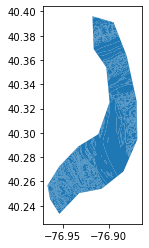

In [5]:
# tell matplot lib to publish here
%matplotlib inline

# visualize
myaoi.plot()

In [6]:
# what ssurgo properties can we get?  Three functions tell us.
# (numeric) numprops, (categorical)catprops, allprops
# aggregation method selected guides which properties are available.

# aggregation methods: weighted avergae (wtd_avg),  dominant component numeric (dom_comp_num), minimum maximum (minmax)
# can get numeric rpoperties (percent clay, unrubber fiber percent, cation exchange capacity,...)

# aggregation methods: dominant component categorical (dom_comp_cat), dominant condition (dom_cond)
# can get categorical properties (hydrologic soil group, drainage class, taxonomic order,...)

# use column name where assigning proprerty for sdaprop.getprop()
# to see the properties

# sdaprop.numprops()
sdaprop.catprops()


{'Corrosion of Concrete': 'corcon',
 'Corrosion of Steel': 'corsteel',
 'Drainage Class': 'drainagecl',
 'Hydrologic Group': 'hydgrp',
 'Taxonomic Class Name': 'taxclname',
 'Taxonomic Order': 'taxorder',
 'Taxonomic Suborder': 'taxsuborder',
 'Taxonomic Temperature Regime': 'taxtempregime',
 'Wind Erodibility Group': 'weg',
 'Wind Erodibility Index': 'wei',
 't Factor': 'tfact'}

In [7]:
# now get a SSURGO property, sandtotal_r
wtdavg=sdaprop.getprop(df=myaoi,column='mukey',method='wtd_avg',top=0,bottom=100,prop='sandtotal_r',minmax=None,prnt=False,meta=False)

In [8]:
# remove duplicate columns
myaoi_cols = myaoi.columns.tolist()
wtdavg_cols = wtdavg.columns.tolist()
drop_cols = [col for col in wtdavg_cols if col in myaoi_cols and col != 'mukey']
wtdavg.drop(columns = drop_cols, inplace = True)

# join/merge the results, show first record
mymerge = myaoi.merge(wtdavg, how = 'inner', on = 'mukey')
mymerge.head(1)

areasymbol                      areaname  \
0      PA043  Dauphin County, Pennsylvania   

                                                      muname musym   mukey  \
0  Comly silt loam, 2 to 8 percent slopes, moderately eroded  CoB2  540723   

  nat_musym  \
0      l4np   

                                                                                                                                                                                                                                                                                             geometry  \
0  POLYGON ((-76.87705 40.31628, -76.87730 40.31654, -76.87739 40.31657, -76.87754 40.31657, -76.87756 40.31672, -76.87692 40.31741, -76.87655 40.31772, -76.87642 40.31778, -76.87632 40.31777, -76.87621 40.31758, -76.87653 40.31699, -76.87674 40.31685, -76.87689 40.31667, -76.87705 40.31628))   

  sandtotal_r  
0       29.04

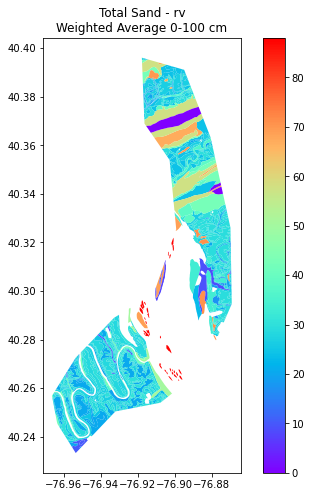

In [9]:
# visualize
import matplotlib.pyplot as plt, pandas as pd

mymerge['sandtotal_r'] = pd.to_numeric(mymerge['sandtotal_r'])
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,8)
mymerge.plot(column = 'sandtotal_r', ax=ax, cmap = 'rainbow',
            legend = True)

# add a legend
leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.2,1.0))
ax.set(title = 'Total Sand - rv\nWeighted Average 0-100 cm')

plt.show()

In [10]:
#visualize with leaflet style map

import folium
env = mymerge.envelope
cent = env.centroid
x = cent.x[0]
y = cent.y[0]
m = folium.Map([y, x], zoom_start = 11, tiles = "CartoDB positron")
#add required column feature.properties.x that matches x
mymerge['feature.properties.musym'] = mymerge['musym']
folium.Choropleth(geo_data = mymerge, data = mymerge, columns = ['musym','sandtotal_r'], key_on = "feature.properties.musym", fill_color = 'YlOrRd', fill_opacity = 1, legend_name = "Sand Percentage").add_to(m)

style = {'weight': 0}
for _,v in mymerge.iterrows():
    geoj = folium.GeoJson(data=v['geometry'], style_function = lambda x: style)
#     folium.Popup("% Sand: " + str(v['sandtotal_r'])).add_to(geoj)
    folium.Tooltip("% Sand: " + str(v['sandtotal_r'])).add_to(geoj)
    geoj.add_to(m)
m


C:\Program Files\ArcGIS\Pro\bin\Python\envs\pro27_clone\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
